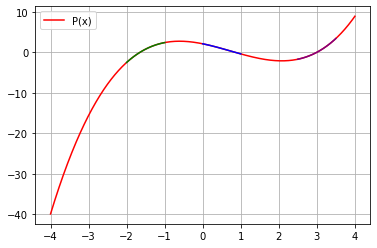

In [19]:
# Вариант 2 + 10 = 12
# №1.1. Задать функцию P(x) и построить ее график.
# По графику определить отрезки локализации для каждого корня

import math
import numpy
import matplotlib.pyplot as plt

def P(x):
    return 0.5 * (x**3) - 1.1 * (x**2) - 1.9 * x + 2.1

# Точность
eps = 10**(-8)
# Зададим некоторые a и b
a = -4
b = 4

x_plot = numpy.linspace(a, b, 1000)
plt.plot(x_plot, P(x_plot), color = 'red', label = 'P(x)')
plt.legend()
plt.grid(True)

# Имеем следующие отрезки локализации: [-2; -1], [0; 1], [2.5; 3.5].
# Других отрезков быть не может, т.к. P(x) - многочлен, имеющий
# до 3 вещественных корней

x_plot = numpy.linspace(-2, -1, 1000)
plt.plot(x_plot, P(x_plot), color = 'green', label = 'P1(x)')
x_plot = numpy.linspace(0, 1, 1000)
plt.plot(x_plot, P(x_plot), color = 'blue', label = 'P2(x)')
x_plot = numpy.linspace(2.5, 3.5, 1000)
plt.plot(x_plot, P(x_plot), color = 'purple', label = 'P3(x)')

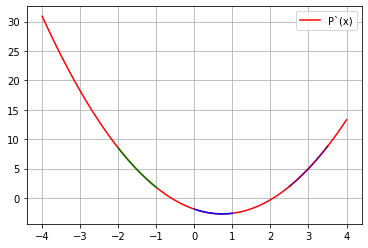

In [20]:
# №1.2. Задать производную от многочлена P(x) и построить ее график.
# Проверить, что на отрезках локализации производная функции
# сохраняет постоянный знак. Если условие не выполнено, то следует
# уменьшить длину отрезка локализации корня.

def derP(x):
    return 1.5 * (x**2) - 2.2 * x - 1.9

x_plot = numpy.linspace(a, b, 1000)
plt.plot(x_plot, derP(x_plot), color = 'red', label = 'P`(x)')
plt.legend()
plt.grid(True)

x_plot = numpy.linspace(-2, -1, 1000)
plt.plot(x_plot, derP(x_plot), color = 'green', label = 'P`1(x)')
x_plot = numpy.linspace(0, 1, 1000)
plt.plot(x_plot, derP(x_plot), color = 'blue', label = 'P`2(x)')
x_plot = numpy.linspace(2.5, 3.5, 1000)
plt.plot(x_plot, derP(x_plot), color = 'purple', label = 'P`3(x)')

# Видно, что на отрезках локализации производная сохраняет знак.

In [21]:
# №1.3 Для каждого корня определить итерационный параметр alpha и
# параметр q, используя формулы:

# M и m взяты приближённо исходя из графика функции.
derPM = [derP(-2), derP(0), derP(3.5)]
derPm = [derP(-1), derP(0.5), derP(2.5)]
alpha = [0, 0, 0]
q = [0, 0, 0]

for i in range(3):
    alpha[i] = 2 / (derPM[i] + derPm[i])
    q[i] = abs((derPM[i] - derPm[i])/(derPM[i] + derPm[i]))

print("M: ", derPM)
print("m: ", derPm)
print("Alpha: ", alpha)
print("q: ", q)

# Начальные значения x* - середины отрезков локализации.
xArr = [-1.5, 0.5, 3]
it = [0, 0, 0]

# №1.4 Составить программу для нахождения корня с
# заданной точностью eps по методу простой итерации.
# В качестве расчетной формулы использовать метод простой итерации с параметром.

def methodParam(x, alpha, q, eps):
    newX = x - alpha * P(x)
    it = 1
    while (abs(x - newX) >= (1 - q)*eps/q):
        x = newX
        newX = x - alpha * P(x)
        it = it + 1
    return (newX, it)
# №1.4 Используя программу, найти все корни многочлена с указанной точностью.
for i in range(3):
    xArr[i], it[i] = methodParam(xArr[i], alpha[i], q[i], eps) 
    
print("x: ", xArr)
print("iterations: ", it)

M:  [8.5, -1.9, 8.774999999999999]
m:  [1.8000000000000003, -2.625, 1.975]
Alpha:  [0.1941747572815534, -0.4419889502762431, 0.186046511627907]
q:  [0.6504854368932038, 0.16022099447513813, 0.6325581395348837]
x:  [-1.6489995999579972, 0.8489996030821712, 3.0]
iterations:  [9, 11, 1]


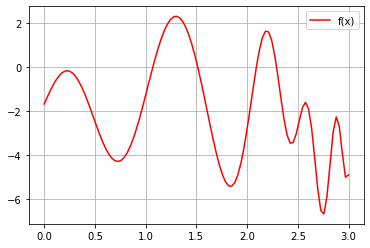

In [22]:
# №2.1 f(x) = 2sin(2 pi x) - 2sin(3^x) - x, [0, 3]
# f'(x) = 4pi * cos(2 pi x) - 3^x * ln(3) * 2cos(3^x) - 1

def f(x):
    sin = numpy.vectorize(numpy.math.sin)
    # return (2 * math.sin(2 * math.pi * x) - 2 * math.sin(3**x) - x)
    return (2 * sin(2 * math.pi * x) - 2 * sin(3**x) - x)
def derF(x):
    cos = numpy.vectorize(numpy.math.cos)
    return (4 * math.pi * cos(2 * math.pi * x) - (3**x) * math.log(3) * 2 * cos(3**x) - 1)

eps = 10**(-12)
# Зададим a и b
a = 0
b = 3

x_plot = numpy.linspace(a, b, 100)
plt.plot(x_plot, f(x_plot), color = 'red', label = 'f(x)')
plt.legend()
plt.grid(True)

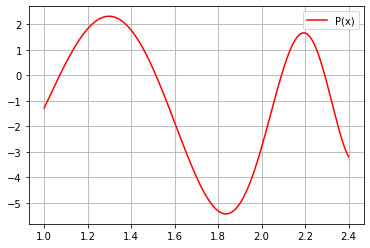

In [23]:
x_plot = numpy.linspace(1.0, 2.4, 1000)
plt.plot(x_plot, f(x_plot), color = 'red', label = 'P(x)')
plt.legend()
plt.grid(True)
# Отрезки локализации корней - [1.0; 1.2], [1.4; 1.6], [2.0; 2.2], [2.2; 2.4]

In [24]:
# №2.2, 2.3

def Newton(x, eps):
    newX = x - f(x)/derF(x)
    it = 1
    while (abs(x - newX) >= eps):
        it = it + 1
        x = newX
        newX = x - f(x)/derF(x)
    return (x, it)
    
def Steffensen(x, eps):
    temp = f(x)
    newX = x - (temp**2)/(f(x + temp) - temp)
    it = 1
    while (abs(x - newX) >= eps) and ((f(x + temp) - temp) != 0):
        # numpy.seterr('raise')
        it = it + 1
        x = newX
        temp = f(x)
        if (f(x + temp) - temp) != 0:
            newX = x - (temp**2)/(f(x + temp) - temp)
    return (x, it)

rootsN = [1.1, 1.5, 2.1, 2.3]
itersN = [0, 0, 0, 0]

for i in range(4):
    rootsN[i], itersN[i] = Newton(rootsN[i], eps)
print("Newton:")
print("x: ", rootsN)
print("it: ", itersN)

rootsS = [1.1, 1.5, 2.1, 2.3]
itersS = [0, 0, 0, 0]

for i in range(4):
    rootsS[i], itersS[i] = Steffensen(rootsS[i], eps)
print("Steffensen:")
print("x: ", rootsS)
print("it: ", itersS)

# Получились неверные корни, увеличим точность начального приближения.
rootsS = [1.08, 1.51, 2.09, 2.29]
itersS = [0, 0, 0, 0]

for i in range(4):
    rootsS[i], itersS[i] = Steffensen(rootsS[i], eps)
print("Steffensen after updated roots:")
print("x: ", rootsS)
print("it: ", itersS)

Newton:
x:  [1.0712800466040713, 1.514011303745059, 2.0914351881615727, 2.2907792781776726]
it:  [4, 4, 4, 4]
Steffensen:
x:  [-0.540866592543439, 1.5140113037450285, -0.5408665925434776, 3.2859867335074378]
it:  [41, 5, 49, 7]
Steffensen after updated roots:
x:  [1.0712800466043955, 1.5140113037450287, 2.0914351881616065, 2.2907792781776477]
it:  [5, 5, 5, 5]


In [25]:
# №2.4
def UpdNewton(x, eps, itLim):
    r = []
    it = 1
    newX = x - f(x)/derF(x)
    r.append(abs(f(x)))
    while (abs(newX - x) >= eps) and (it < itLim):
        x = newX
        r.append(abs(f(x)))
        it = it + 1
        newX = x - f(x)/derF(x)
    return (r, x, it)
    
def UpdSteffensen(x, eps, itLim):
    r = []
    temp = f(x)
    newX = x - (temp**2)/(f(x + temp) - temp)
    it = 1
    r.append(abs(temp))
    while (abs(newX - x) >= eps) and (it < itLim) and ((f(x + temp) - temp) != 0):
        it = it + 1
        x = newX
        temp = f(x)
        r.append(abs(temp))
        if (f(x + temp) - temp) != 0:
            newX = x - (temp**2)/(f(x + temp) - temp)
    return (r, x, it)

rootsN = [1.1, 1.5, 2.1, 2.3]
itersN = [0, 0, 0, 0]
rN = [[], [], [], []]
for i in range(4):
    rN[i], rootsN[i], itersN[i] = UpdNewton(rootsN[i], eps, 10)
print("Newton:")
print("r: ", rN)
print("x: ", rootsN)
print("it: ", itersN)

# Увеличим точность начального приближения.
rootsS = [1.08, 1.51, 2.09, 2.29]
itersS = [0, 0, 0, 0]
rS = [[], [], [], []]
for i in range(4):
    rS[i], rootsS[i], itersS[i] = UpdSteffensen(rootsS[i], eps, 10)
print("Steffensen after updated roots:")
print("x: ", rootsS)
print("r: ", rS)
print("x: ", rootsS)
print("it: ", itersS)

Newton:
r:  [[0.4861835051183019, 0.0171796140823961, 1.389277912133835e-05, 9.225731290030126e-12], [0.2705015322420463, 0.006286706918579021, 2.8687926543202735e-06, 6.015188347419098e-13], [0.2381789075890164, 0.006143735097953407, 3.2971476793264287e-06, 9.543477119677846e-13], [0.29220005352376477, 0.0057446302882837585, 2.9387570346095515e-06, 7.678302438307583e-13]]
x:  [1.0712800466040713, 1.514011303745059, 2.0914351881615727, 2.2907792781776726]
it:  [4, 4, 4, 4]
Steffensen after updated roots:
x:  [1.0712800466043955, 1.5140113037450287, 2.0914351881616065, 2.2907792781776477]
r:  [[0.1507219795463297, 0.05342654832889138, 0.0015223480806800804, 2.0162690126390714e-06, 3.5795810759964297e-12], [0.07863852379548697, 0.006058227722486764, 4.8880539538886936e-05, 3.2580074194044073e-09, 3.3306690738754696e-15], [0.04098355102634521, 0.0027732287176727155, 1.932500769097345e-05, 9.657541433227834e-10, 2.6645352591003757e-15], [0.024079932979232943, 0.0011564487180524274, 3.54212

No handles with labels found to put in legend.


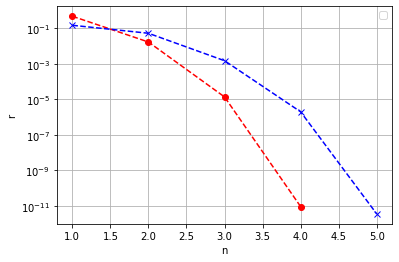

In [26]:
iterations1 = [1, 2, 3, 4]
iterations2 = [1, 2, 3, 4, 5]

plt.xlabel('n')
plt.ylabel('r')
plt.legend()
plt.grid(True)
plt.yscale('log')
r1 = rN[0]
r2 = rS[0]
plt.plot(iterations1, r1, '--ro', color = 'red', label = 'Newton for x1')
plt.plot(iterations2, r2, '--bx', color = 'blue', label = 'Steffensen for x1')

No handles with labels found to put in legend.


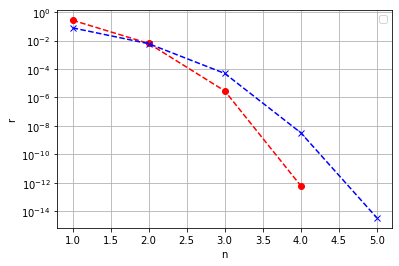

In [27]:
plt.xlabel('n')
plt.ylabel('r')
plt.legend()
plt.grid(True)
plt.yscale('log')
r1 = rN[1]
r2 = rS[1]
plt.plot(iterations1, r1, '--ro', color = 'red', label = 'Newton for x2')
plt.plot(iterations2, r2, '--bx', color = 'blue', label = 'Steffensen for x2')

No handles with labels found to put in legend.


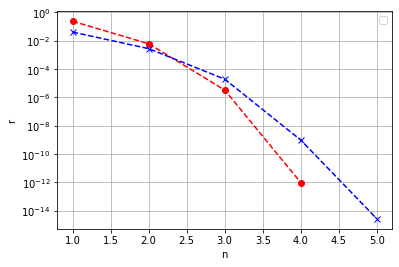

In [28]:
plt.xlabel('n')
plt.ylabel('r')
plt.legend()
plt.grid(True)
plt.yscale('log')
r1 = rN[2]
r2 = rS[2]
plt.plot(iterations1, r1, '--ro', color = 'red', label = 'Newton for x3')
plt.plot(iterations2, r2, '--bx', color = 'blue', label = 'Steffensen for x3')

No handles with labels found to put in legend.


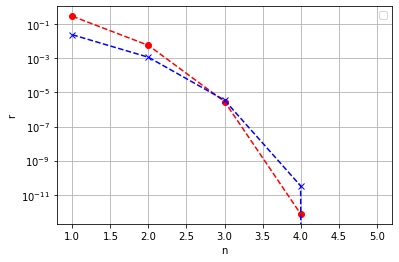

In [29]:
plt.xlabel('n')
plt.ylabel('r')
plt.legend()
plt.grid(True)
plt.yscale('log')
r1 = rN[3]
r2 = rS[3]
plt.plot(iterations1, r1, '--ro', color = 'red', label = 'Newton for x4')
plt.plot(iterations2, r2, '--bx', color = 'blue', label = 'Steffensen for x4')